In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy.stats as stats


# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [3]:
data = data.drop(data.columns[0], axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


The model where the outcome Sales is predicted by the features TV, Radio, and Newspaper explains 89.7% of the variance in Sales.  Note that we don't know from these results how much of that variance is explained by each of the three features.  Looking at the coefficients, there appears to be a base rate of Sales that happen even with no ads in any medium (intercept: 2.939) and sales have the highest per-unit increase when ads are on the radio (0.189).  

## Assumptions of Multivariable Linear Regression

For regression to work its magic, inputs to the model need to be consistent with four assumptions:


### Assumption one: linear relationship
In linear regression features need to have linear relationship with the outcome. <br>
Can be fixed with non-linear transformations.

### Assumption two: multivariate normality
Normality is normally a model assumption so we need to transform non-normal variables. <br>
Can be fixed by transformations like square root/inverse/log.

### Assumption three: homoscedasticity
The distribution of error should be consistent for all predicted values. <br>
Can be fixed by transforming dependent variable or adding features.

### Assumption four:  low multicolinearity
Correlation among features should be low/none. <br>
Can be fixed with PCA or by discarding highly correlated variables.


## Fixing Assumptions
### Multivariate non-normality

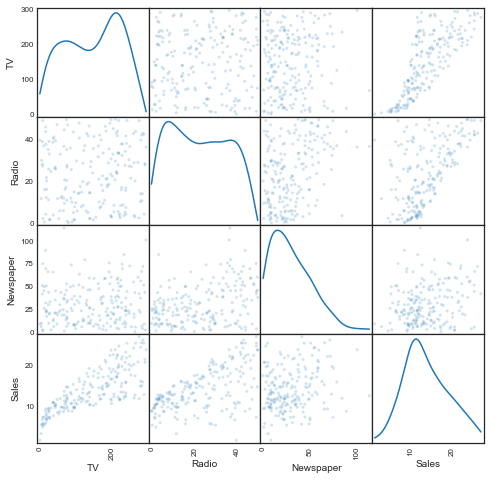

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha = 0.2, figsize = (8, 8), diagonal = 'kde');

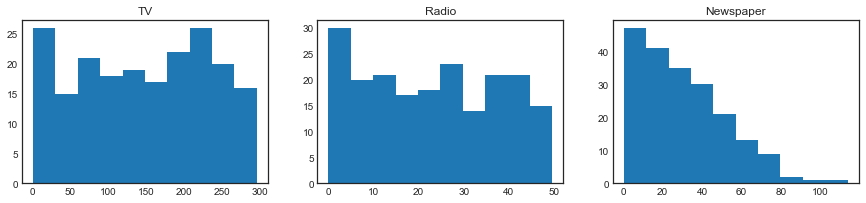

In [52]:
# Making a plots for raw values
fig = plt.figure(figsize=(15,3))

fig.add_subplot(131)
plt.hist(data.TV)
plt.title('TV')

fig.add_subplot(132)
plt.hist(data.Radio)
plt.title('Radio')

fig.add_subplot(133)
plt.hist(data.Newspaper)
plt.title('Newspaper')

plt.show()

In [44]:
data['TVBC'] = stats.boxcox(data.TV)[0]

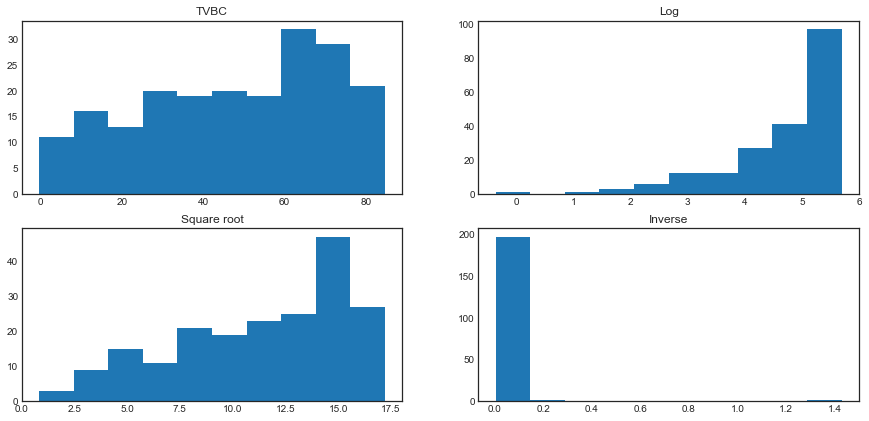

In [45]:
# Making a four-panel plot for TV
fig = plt.figure(figsize=(15,7))

fig.add_subplot(221)
plt.hist(data.boxcox)
plt.title('TVBC')

fig.add_subplot(222)
plt.hist(np.log(data['TV']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['TV']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/data['TV'])
plt.title('Inverse')
plt.show();

In [46]:
print('BoxCox: ', stats.shapiro(data.boxcox))
print('Log: ', stats.shapiro(np.log(data['TV'])))
print('Square root: ', stats.shapiro(np.sqrt(data['TV'])))
print('Inverse: ', stats.shapiro(1/data['TV']))

BoxCox:  (0.9475795030593872, 1.110264065573574e-06)
Log:  (0.8279647827148438, 4.1153742875521884e-14)
Square root:  (0.9346348643302917, 8.027988940284558e-08)
Inverse:  (0.15050655603408813, 3.965617649278688e-29)


In [10]:
#c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)

data.Radio = data.Radio.replace(0, 0.01)

In [37]:
data['RadioBC'] = stats.boxcox(data['Radio'])[0]

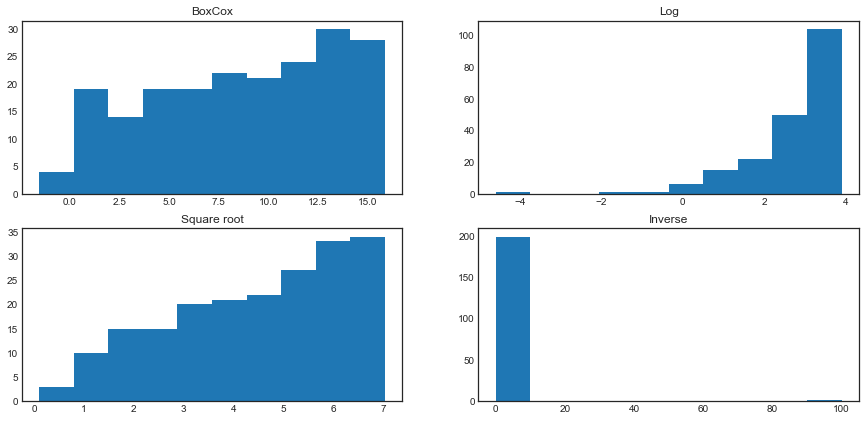

In [38]:
# Making a four-panel plot for Radio

fig = plt.figure(figsize=(15,7))

fig.add_subplot(221)
plt.hist(data.RadioBC)
plt.title('BoxCox')

fig.add_subplot(222)
plt.hist(np.log(data['Radio'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Radio']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/data['Radio'])
plt.title('Inverse')
plt.show()

In [42]:
print('BoxCox: ', stats.shapiro(data.RadioBC))
print('Log: ', stats.shapiro(np.log(data['Radio'])))
print('Square root: ', stats.shapiro(np.sqrt(data['Radio'])))
print('Inverse: ', stats.shapiro(1/data['Radio']))

BoxCox:  (0.9499974250793457, 1.8857966779251e-06)
Log:  (0.8089468479156494, 6.398922682010347e-15)
Square root:  (0.9461217522621155, 8.119491212710273e-07)
Inverse:  (0.05481076240539551, 2.4408720778440427e-30)


In [40]:
data['NewspaperBC'] = stats.boxcox(data['Newspaper'])[0]

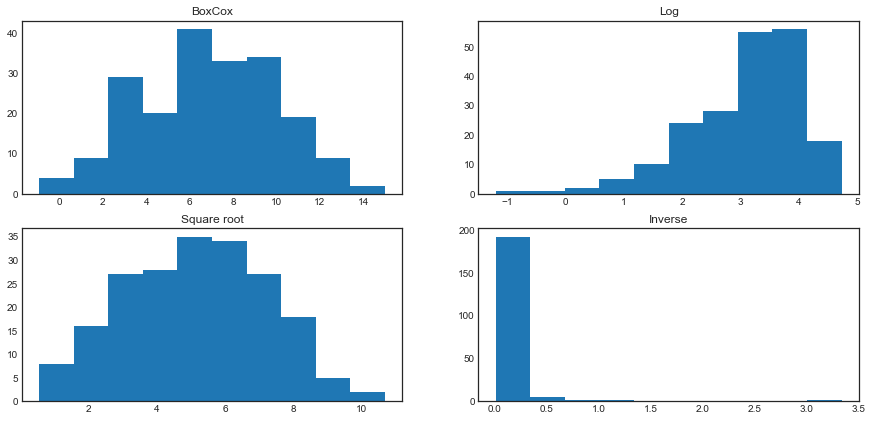

In [41]:
# Making a four-panel plot for Newspaper
fig = plt.figure(figsize=(15,7))

fig.add_subplot(221)
plt.hist(data.NewspaperBC)
plt.title('BoxCox')

fig.add_subplot(222)
plt.hist(np.log(data['Newspaper']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Newspaper']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/data['Newspaper'])
plt.title('Inverse')
plt.show()

In [43]:
print('BoxCox: ', stats.shapiro(data.NewspaperBC))
print('Log: ', stats.shapiro(np.log(data['Newspaper'])))
print('Square root: ', stats.shapiro(np.sqrt(data['Newspaper'])))
print('Inverse: ', stats.shapiro(1/data['Newspaper']))

BoxCox:  (0.992135763168335, 0.35658639669418335)
Log:  (0.9253212809562683, 1.4571658546458366e-08)
Square root:  (0.9914245009422302, 0.2854223847389221)
Inverse:  (0.25167763233184814, 1.0065612853797396e-27)


In [47]:
#for all variables boxcox is best transformation (highest w value and p value)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TVBC','RadioBC','NewspaperBC']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.16984833 0.58475583 0.02299761]]

Intercept: 
 [0.58842925]

R-squared:
0.9051267222091254


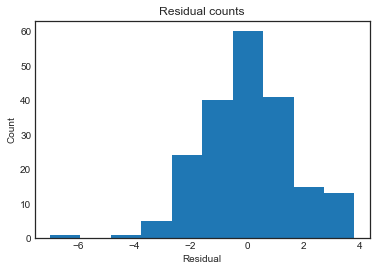

(0.9803563952445984, 0.006683307699859142)

In [51]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

stats.shapiro(residual)

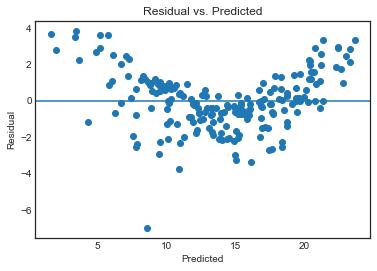

In [49]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [50]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TVBC,RadioBC,NewspaperBC
TVBC,1.000,0.049,0.041
RadioBC,0.049,1.000,0.289
NewspaperBC,0.041,0.289,1.000
